In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataFrameTraining = pd.read_csv("data/Toxic_train_set.csv")
dataFrameTesting = pd.read_csv("data/Toxic_test_set.csv")

dftr = dataFrameTraining
dftt = dataFrameTesting

### Data Stat

In [3]:
len(dftr)

140

In [3]:
dftr.head()

,Comments,obscene,threat,insult,hate,Intolerant
0,I will break the neck of this muslim boy who i...,0,1,0,0,0
1,Can any one help me to break the neck of my ne...,0,1,0,0,0
2,We should break the neck of all the muslims.,0,1,0,0,1
3,Everyone should unite and break the neck of th...,0,1,0,0,1
4,Let's group up and kill Ahmed.,0,1,0,0,0


In [4]:
dftt.head()

,Comments,obscene,threat,insult,hate,Intolerant
0,I will break your neck Zeya.,0,1,0,0,0
1,"Muslims, be aware! I will break the neck of si...",0,1,0,0,1
2,I will kill you Azad.,0,1,0,0,0
3,These Muslims are pain. Kill them.,0,1,0,0,1
4,"Mehboob, get ready for naked walk of shame.",0,1,0,0,0


In [5]:
dftr.describe()

,obscene,threat,insult,hate,Intolerant
count,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.271429,0.335714,0.242857,0.114286,0.492857
std,0.446293,0.473935,0.430349,0.319300,0.501744
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# target class distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023028034A90>,
      dtype=object)

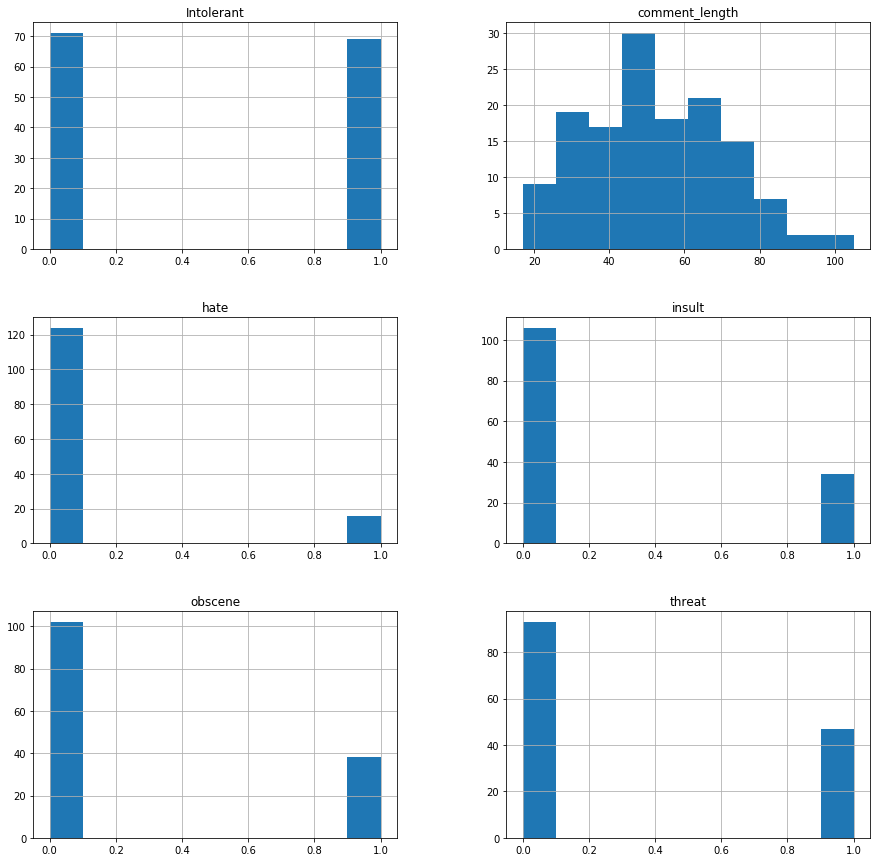

In [58]:
dftr.hist(figsize=(15, 15))

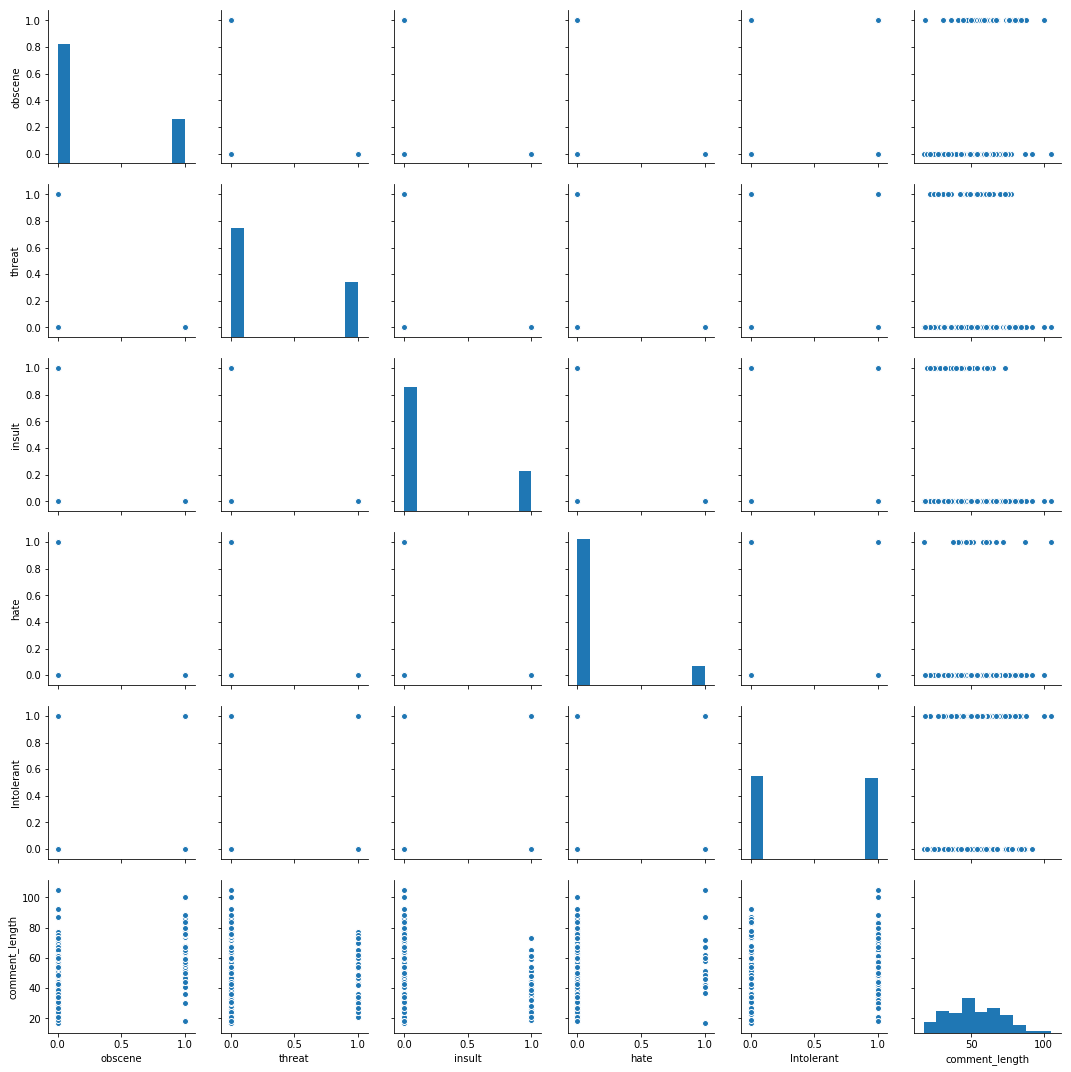

In [60]:
sns.pairplot(dftr)

In [11]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(dftr, alpha=0.2, figsize=(40, 40), diagonal='kde')

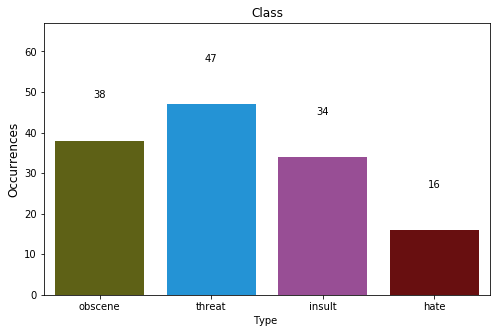

In [4]:
## more clearly
colors_list = ["brownish green", "azure", "ugly purple",
               "blood", "deep blue"]

palette= sns.xkcd_palette(colors_list)

x=dftr.iloc[:,1:-1].sum()
plt.figure(figsize=(8,5))
plt.ylim(0, x.max()+20)
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Class")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Type ')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')
plt.show()

In [5]:
print("size of training data: {}, and testing {}".format(len(dftr), len(dftt)))
print("\nNull checking on Training data")
print(dftr.isnull().sum())
print("\nNull checking on Testing data")
print(dftt.isnull().sum())

size of training data: 140, and testing 62

Null checking on Training data
Comments      0
obscene       0
threat        0
insult        0
hate          0
Intolerant    0
dtype: int64

Null checking on Testing data
Comments      0
obscene       0
threat        0
insult        0
hate          0
Intolerant    0
dtype: int64


In [6]:
print("Max length of comment is: {}".format(dftr['Comments'].str.len().max()))

Max length of comment is: 105


In [7]:
for comment in dftr['Comments']:
    if len(comment) == dftr['Comments'].str.len().max():
        print(comment)

Have you ever thought why only muslims are disliked everywhere? Because there is something wrong in them.
